In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df=pd.read_csv(r"C:\Users\KIIT\Downloads\netflix_titles.csv (1)\netflix_titles.csv")

In [26]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [27]:
df.shape

(8807, 12)

In [28]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [29]:
df.duplicated().sum()

0

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [13]:
#checking missing values

In [31]:
df.isnull().mean()*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [16]:
#handling missing values


In [32]:
df['country']=df['country'].fillna(data['country'].mode()[0])
df['country'].isnull().sum()

0

In [20]:
#Data cleaning

In [34]:
df.dropna(inplace=True)

# Drop Duplicates
df.drop_duplicates(inplace= True)

In [35]:
df = df.drop(columns=['cast', 'show_id', 'title', 'description'],axis=1)

In [36]:
df.head()

,type,director,country,date_added,release_year,rating,duration,listed_in
2,TV Show,Julien Leclercq,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
5,TV Show,Mike Flanagan,United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
6,Movie,"Robert Cullen, José Luis Ucha",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies
7,Movie,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
8,TV Show,Andy Devonshire,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV"


In [37]:
df.rename(columns={'listed_in' :'genre'}, inplace=True)

In [38]:
df.head()

,type,director,country,date_added,release_year,rating,duration,genre
2,TV Show,Julien Leclercq,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
5,TV Show,Mike Flanagan,United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
6,Movie,"Robert Cullen, José Luis Ucha",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies
7,Movie,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
8,TV Show,Andy Devonshire,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV"


In [39]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_11804\1147548429.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)


In [40]:
df.head()

,type,director,country,date_added,release_year,rating,duration,genre
2,TV Show,Julien Leclercq,United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
5,TV Show,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
6,Movie,"Robert Cullen, José Luis Ucha",United States,2021-09-24,2021,PG,91 min,Children & Family Movies
7,Movie,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
8,TV Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5696 entries, 2 to 8806
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          5696 non-null   object        
 1   director      5696 non-null   object        
 2   country       5696 non-null   object        
 3   date_added    5692 non-null   datetime64[ns]
 4   release_year  5696 non-null   int64         
 5   rating        5696 non-null   object        
 6   duration      5696 non-null   object        
 7   genre         5696 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 400.5+ KB


In [42]:
#Calculating the value of each column

In [43]:
print(df['type'].value_counts())

type
Movie      5518
TV Show     178
Name: count, dtype: int64


In [44]:
print("Directors  "  ,df['director'].value_counts().head(5))

Directors   director
Raúl Campos, Jan Suter    18
Rajiv Chilaka             17
Marcus Raboy              16
Jay Karas                 14
Suhas Kadav               13
Name: count, dtype: int64


In [45]:
print("Country  ",df['country'].value_counts().head(5))

Country   country
United States     2210
India              875
United Kingdom     183
Canada             107
Spain               91
Name: count, dtype: int64


In [46]:
print("Date  ",df['date_added'].value_counts().head(5))

Date   date_added
2020-01-01    97
2019-11-01    70
2019-12-31    67
2018-03-01    67
2018-10-01    62
Name: count, dtype: int64


In [47]:
print("Release_year  ",df['release_year'].value_counts().head(5))

Release_year   release_year
2018    691
2017    683
2016    584
2019    570
2020    499
Name: count, dtype: int64


In [48]:
print("Genre ",df['genre'].value_counts().head(5))

Genre  genre
Dramas, International Movies                        361
Stand-Up Comedy                                     309
Comedies, Dramas, International Movies              271
Dramas, Independent Movies, International Movies    252
Children & Family Movies, Comedies                  193
Name: count, dtype: int64


In [49]:
print("Rating  ",df['rating'].value_counts().head(5))

Rating   rating
TV-MA    1939
TV-14    1329
R         789
PG-13     477
TV-PG     456
Name: count, dtype: int64


In [50]:
print("Duration  ",df['duration'].value_counts().head(5))

Duration   duration
94 min      140
1 Season    137
97 min      136
93 min      135
95 min      129
Name: count, dtype: int64


In [51]:
#ANALYZING TOP 10 MOVIES AND TV-SHOWS

In [52]:
directors_Movies = df['director'][df['type']=='Movie'].value_counts().sort_values(ascending=False)[0:10].reset_index()
print(directors_Movies)

                 director  count
0  Raúl Campos, Jan Suter     18
1           Rajiv Chilaka     17
2            Marcus Raboy     15
3               Jay Karas     14
4             Suhas Kadav     13
5     Cathy Garcia-Molina     13
6         Youssef Chahine     12
7         Martin Scorsese     12
8             Jay Chapman     12
9        Steven Spielberg     11


In [53]:
directors_TV_Shows = df['director'][df['type']=='TV Show'].value_counts().sort_values(ascending=False)[0:10].reset_index()
print(directors_TV_Shows)

              director  count
0  Alastair Fothergill      3
1       Iginio Straffi      2
2          Stan Lathan      2
3      Rob Seidenglanz      2
4          Hsu Fu-chun      2
5          Shin Won-ho      2
6     Sakon Tiacharoen      1
7      Andy Devonshire      1
8    Kongkiat Komesiri      1
9       Bunmi Ajakaiye      1


In [54]:
Country_Movies = df['country'][df['type']=='Movie'].value_counts().sort_values(ascending=False)[0:10].reset_index()
print(Country_Movies)

          country  count
0   United States   2152
1           India    868
2  United Kingdom    164
3          Canada    104
4           Egypt     90
5         Nigeria     84
6           Spain     84
7       Indonesia     76
8          Turkey     74
9           Japan     73


In [55]:
Country_TV_Shows = df['country'][df['type']=='TV Show'].value_counts().sort_values(ascending=False)[0:10].reset_index()
print(Country_TV_Shows )

          country  count
0   United States     58
1  United Kingdom     19
2           Japan     10
3     South Korea     10
4           Spain      7
5           India      7
6          Taiwan      7
7          France      5
8          Turkey      5
9        Thailand      5


In [56]:
Datewise_Movies = df['date_added'][df['type']=='Movie'].value_counts().sort_values(ascending=False)[0:10].reset_index()
print(Datewise_Movies)

  date_added  count
0 2020-01-01     97
1 2019-11-01     70
2 2018-03-01     67
3 2019-12-31     67
4 2018-10-01     62
5 2018-11-01     52
6 2021-07-01     52
7 2019-10-01     49
8 2021-09-01     48
9 2021-06-02     41


In [57]:
Datewise_TV_Shows = df['date_added'][df['type']=='TV Show'].value_counts().sort_values(ascending=False)[0:10].reset_index()
print(Datewise_TV_Shows)

  date_added  count
0 2017-03-31      4
1 2021-06-19      3
2 2021-09-24      3
3 2019-08-15      2
4 2021-08-13      2
5 2019-12-15      2
6 2017-12-31      2
7 2019-09-20      2
8 2021-07-01      2
9 2020-05-15      2


In [58]:
ReleaseYearwise_Movies = df['release_year'][df['type']=='Movie'].value_counts().sort_values(ascending=False)[0:10].reset_index()
print(ReleaseYearwise_Movies)

   release_year  count
0          2018    673
1          2017    664
2          2016    574
3          2019    544
4          2020    458
5          2015    354
6          2014    244
7          2021    227
8          2013    207
9          2012    165


In [59]:
ReleaseYearwise_TV_Shows = df['release_year'][df['type']=='TV Show'].value_counts().sort_values(ascending=False)[0:10].reset_index()
print(ReleaseYearwise_TV_Shows)

   release_year  count
0          2020     41
1          2021     29
2          2019     26
3          2017     19
4          2018     18
5          2015     11
6          2016     10
7          2014      8
8          2012      4
9          2011      3


In [60]:
Ratingwise_Movies = df['rating'][df['type']=='Movie'].value_counts().sort_values(ascending=False)[0:10].reset_index()
print(Ratingwise_Movies)

  rating  count
0  TV-MA   1842
1  TV-14   1279
2      R    788
3  PG-13    477
4  TV-PG    441
5     PG    279
6  TV-Y7    116
7   TV-Y     97
8   TV-G     93
9     NR     58


In [61]:
Ratingwise_TV_Shows =df['rating'][df['type']=='TV Show'].value_counts().sort_values(ascending=False)[0:10].reset_index()
print(Ratingwise_TV_Shows)

  rating  count
0  TV-MA     97
1  TV-14     50
2  TV-PG     15
3  TV-Y7      7
4   TV-Y      5
5   TV-G      3
6      R      1


In [62]:
Durationtime_Movies = df['duration'][df['type']=='Movie'].value_counts().sort_values(ascending=False)[0:10].reset_index()
print(Durationtime_Movies)

  duration  count
0   94 min    140
1   97 min    136
2   93 min    135
3   95 min    129
4   90 min    128
5   91 min    124
6   96 min    117
7  102 min    116
8   98 min    115
9   92 min    114


In [63]:
Durationtime_TV_Show = df['duration'][df['type']=='TV Show'].value_counts().sort_values(ascending=False)[0:10].reset_index()
print(Durationtime_TV_Show)

     duration  count
0    1 Season    137
1   2 Seasons     18
2   5 Seasons      6
3   4 Seasons      4
4   9 Seasons      3
5   6 Seasons      3
6   3 Seasons      3
7   8 Seasons      2
8   7 Seasons      1
9  15 Seasons      1


In [64]:
Genrewise_Movies = df['genre'][df['type']=='Movie'].value_counts().sort_values(ascending=False)[0:10].reset_index()
print(Genrewise_Movies)

                                              genre  count
0                      Dramas, International Movies    361
1                                   Stand-Up Comedy    309
2            Comedies, Dramas, International Movies    271
3  Dramas, Independent Movies, International Movies    252
4                Children & Family Movies, Comedies    193
5                          Children & Family Movies    184
6     Dramas, International Movies, Romantic Movies    174
7                    Comedies, International Movies    173
8                                     Documentaries    163
9   Comedies, International Movies, Romantic Movies    149


In [65]:
Genrewise_TV_Show = df['genre'][df['type']=='TV Show'].value_counts().sort_values(ascending=False)[0:10].reset_index()
print(Genrewise_TV_Show)

                                               genre  count
0  Crime TV Shows, International TV Shows, TV Dramas     18
1  International TV Shows, Romantic TV Shows, TV ...     12
2                                           TV Shows      9
3                  International TV Shows, TV Dramas      8
4          Stand-Up Comedy & Talk Shows, TV Comedies      7
5                                         Docuseries      7
6  International TV Shows, Korean TV Shows, Roman...      5
7     International TV Shows, TV Comedies, TV Dramas      5
8                              Kids' TV, TV Comedies      5
9                                           Kids' TV      5


In [66]:
#ANALYSIS USING GRAPHS

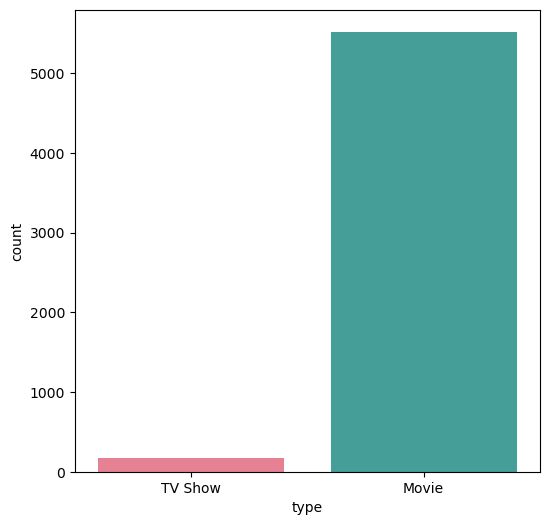

<Axes: ylabel='count'>

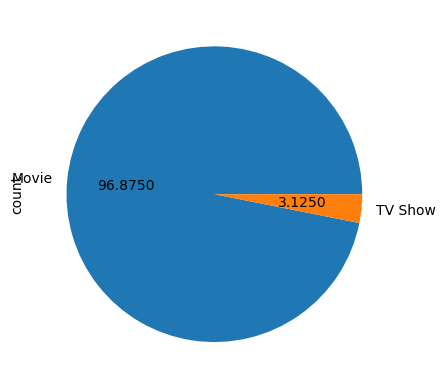

In [67]:
plt.figure(figsize=(6,6))
sns.countplot(x='type',data=df,palette='husl')
plt.show()
df['type'].value_counts().plot(kind='pie',autopct='%.4f')

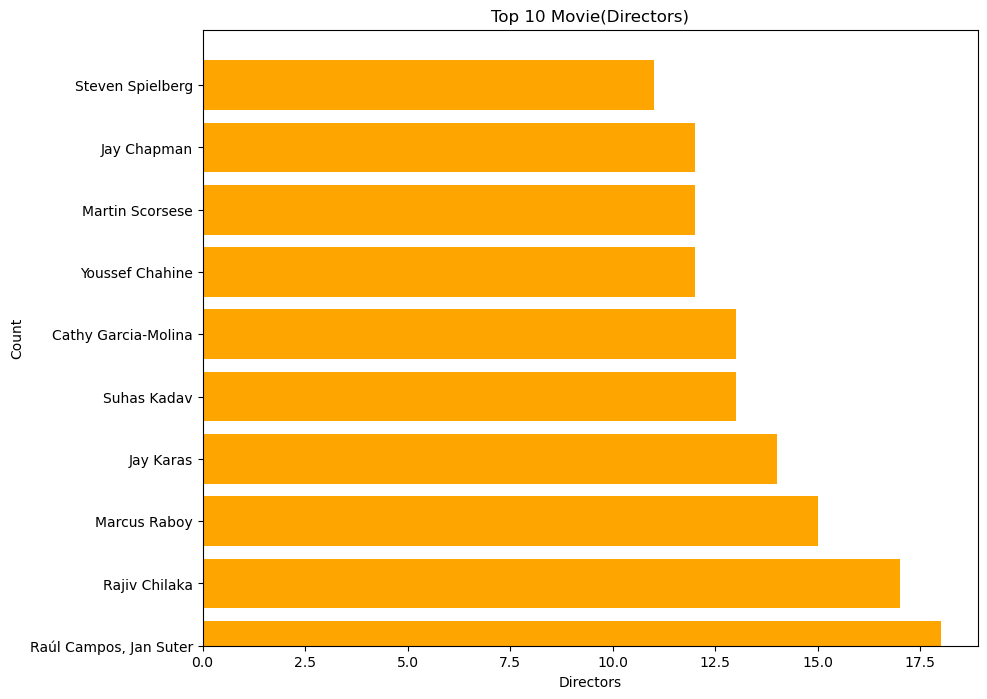

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.barh(directors_Movies["director"],directors_Movies['count'], color ='orange', label='Count')
plt.title('Top 10 Movie(Directors)')
plt.xlabel('Directors')
plt.ylabel('Count')
plt.ylim(bottom=0)
plt.show()

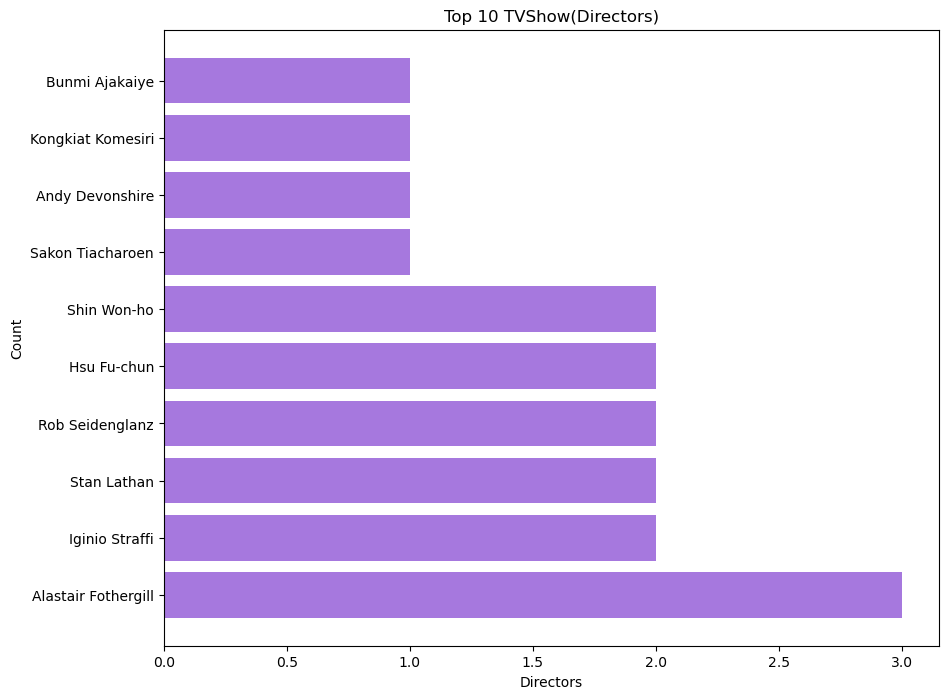

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.barh(directors_TV_Shows["director"],directors_TV_Shows['count'],color ='#a678de', label='Count')
plt.title('Top 10 TVShow(Directors)')
plt.xlabel('Directors')
plt.ylabel('Count')


plt.show()

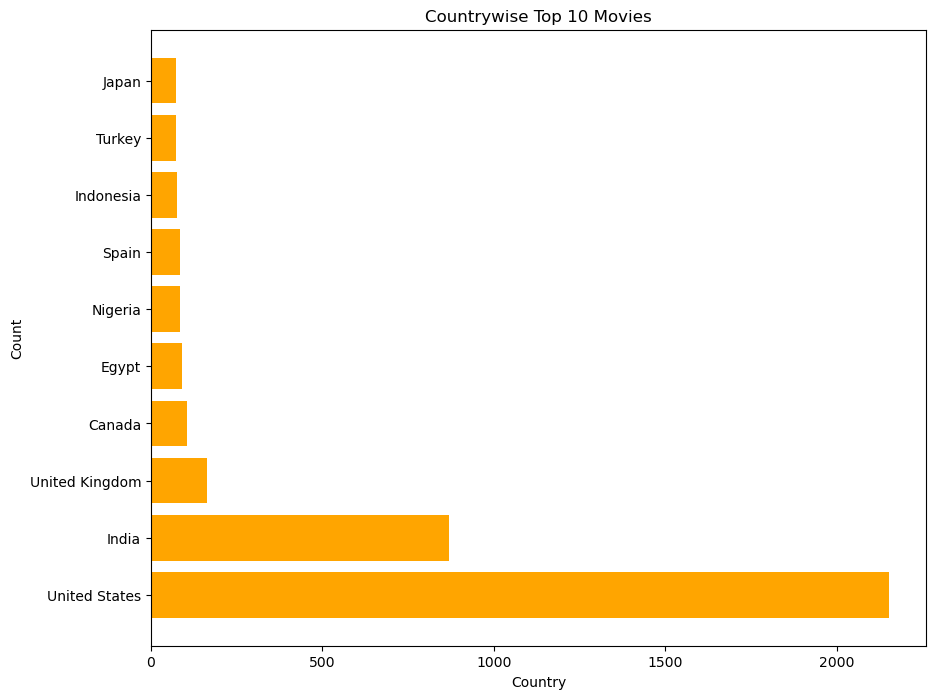

In [70]:
plt.figure(figsize=(10,8))
plt.barh(Country_Movies["country"],Country_Movies['count'],color ='orange', label='Count')
plt.title('Countrywise Top 10 Movies')
plt.xlabel('Country')
plt.ylabel('Count')

plt.show()

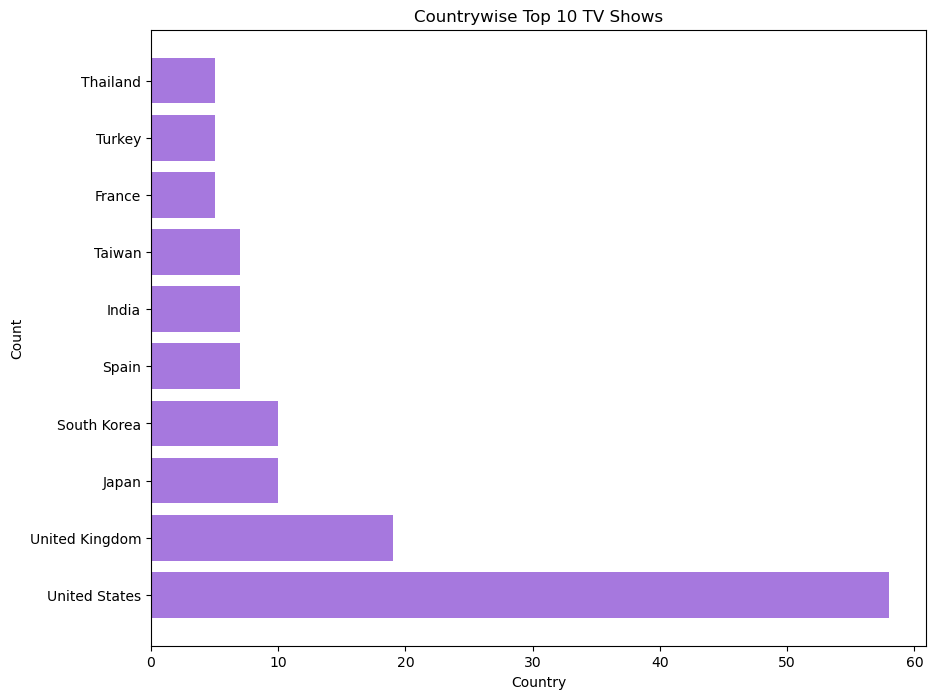

In [71]:
plt.figure(figsize=(10,8))
plt.barh(Country_TV_Shows['country'],Country_TV_Shows['count'],color ='#a678de', label='Count')
plt.title('Countrywise Top 10 TV Shows')
plt.xlabel('Country')
plt.ylabel('Count')

plt.show()

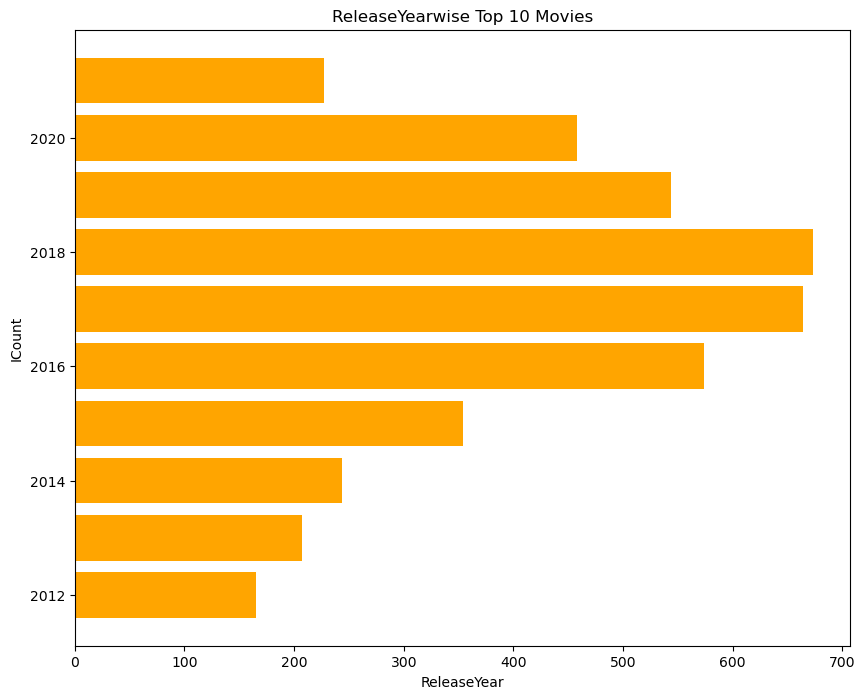

In [72]:
plt.figure(figsize=(10,8))
plt.barh(ReleaseYearwise_Movies["release_year"],ReleaseYearwise_Movies['count'],color ='orange', label='Count')
plt.title('ReleaseYearwise Top 10 Movies')
plt.xlabel('ReleaseYear')
plt.ylabel('ICount')

plt.show()